theory:      c1, c minus 1 magnitude [5. 5.] c1, c minus 1 angle [ 0.78539816 -0.78539816]
computation: c1, c minus 1 magnitude [5. 5.] c1, c minus 1 angle [ 0.78539816 -0.78539816]


Text(137.72222222222223, 0.5, 'angle $c_k$')

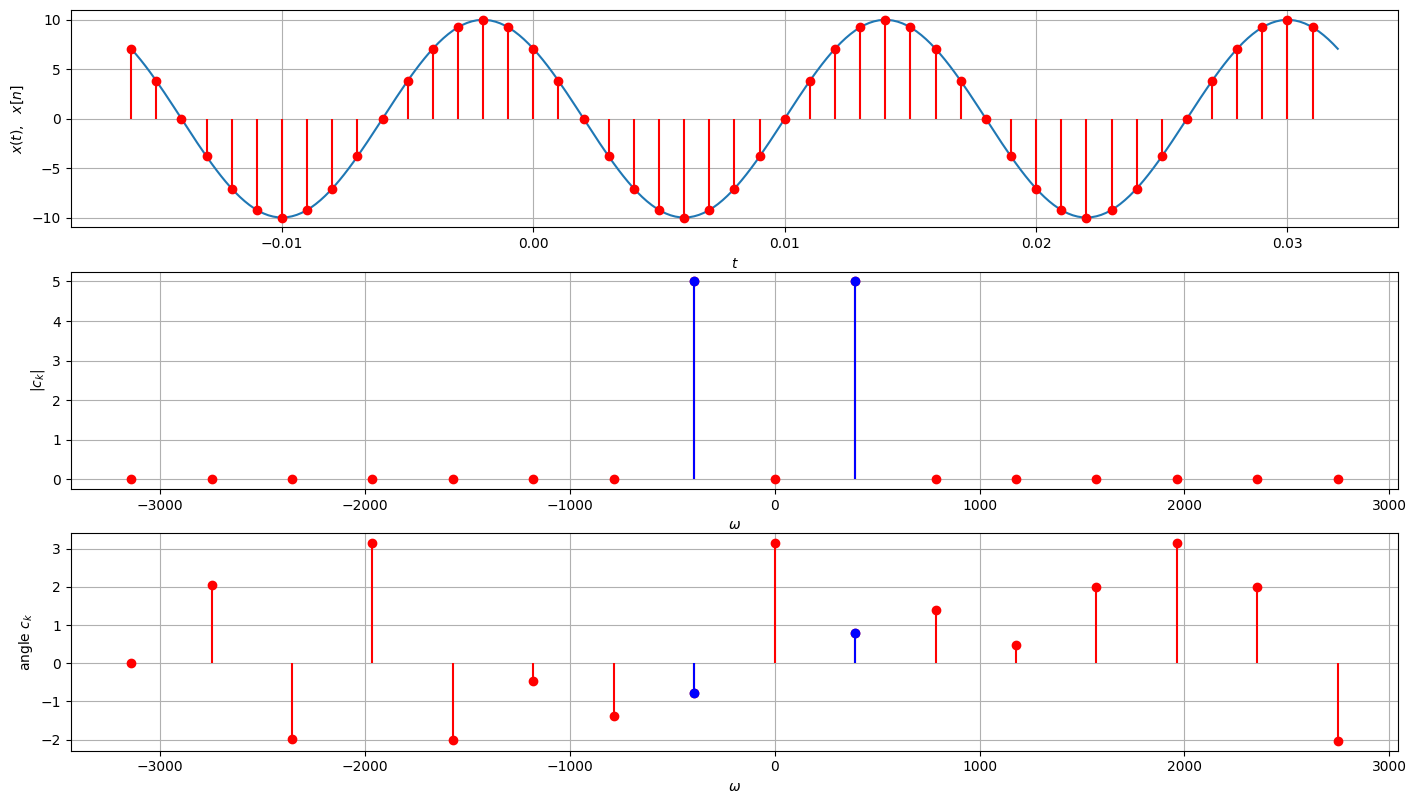

In [1]:
# ================= ISS: FS and FT by DFT
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk
from matplotlib import cm

# >>>>>>>>>>>>>>>>> #fs_cos_ok <<<<<<<<<<<<<<<<<<<<<<<<<
T1 = 0.016
om1 = 2*np.pi / T1
t = np.linspace(-T1,2*T1,256)
x = 10 * np.cos(125 * np.pi * t + np.pi / 4)
Ts = 0.001
Fs = 1000
N = 16
n = np.arange(-16,2*16)
xn = 10 * np.cos(125 * np.pi * n * Ts + np.pi / 4)
# 1 period
n1 = np.arange(16)
xn1 = 10 * np.cos(125 * np.pi * n1 * Ts + np.pi / 4)


fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t, x)
ax[0].stem(n * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t),~~x[n]$')

# theory
c1t = 5 * np.exp(1j * np.pi / 4)
cm1t = 5 * np.exp(-1j * np.pi / 4)   # c minus 1

# computation
Xk = np.fft.fft(xn1)
c = np.fft.fftshift(Xk / N)
c1c = c[int(N/2)+1]                   # the indexing is shifted...
cm1c = c[int(N/2)-1]                   # the indexing is shifted...

#visualization
print("theory:      c1, c minus 1 magnitude",np.abs([c1t,cm1t]), "c1, c minus 1 angle",np.angle([c1t,cm1t]))
print("computation: c1, c minus 1 magnitude",np.abs([c1c,cm1c]), "c1, c minus 1 angle",np.angle([c1c,cm1c]))
k = np.arange(-int(N/2), int(N/2))
ax[1].stem(k * om1, np.abs(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].stem([-om1,om1], np.abs([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$|c_k|$')

ax[2].stem(k * om1, np.angle(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[2].stem([-om1,om1], np.angle([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('angle $c_k$')


Text(137.72222222222223, 0.5, 'angle $c_k$')

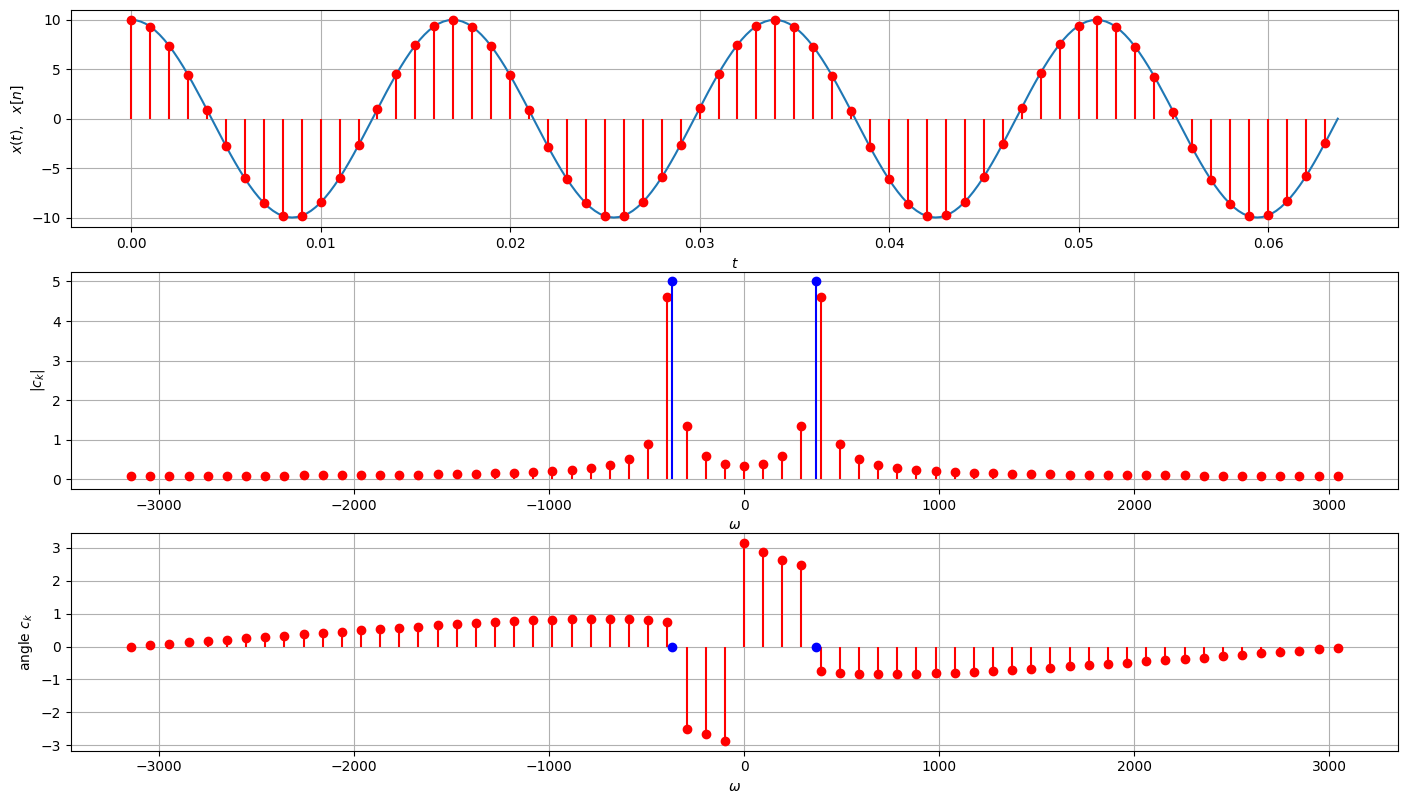

In [2]:
# >>>>>>>>>>>>>>>>> #fs_cos_bad <<<<<<<<<<<<<<<<<<<<<<<<<
om1 = 370
T1 = 2*np.pi / om1
t = np.linspace(0,3.75*T1,256)
x = 10 * np.cos(om1 * t)
Ts = 0.001
Fs = 1000
N = 64
n = np.arange(0,N)
xn = 10 * np.cos(om1 * n * Ts)
# 1 period
n1 = np.arange(N)
xn1 = 10 * np.cos(om1 * n1 * Ts)

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].plot(t, x)
ax[0].stem(n * Ts, xn,basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t),~~x[n]$')

# theory
c1t = 5
cm1t = 5    # c minus 1

# computation
Xk = np.fft.fft(xn1)
c = np.fft.fftshift(Xk / N)
c1c = c[int(N/2)+1]                   # the indexing is shifted...
cm1c = c[int(N/2)-1]                   # the indexing is shifted...

#visualization
k = np.arange(-int(N/2), int(N/2))
ax[1].stem(k * 2 * np.pi / N * Fs, np.abs(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].stem([-om1,om1], np.abs([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$|c_k|$')

ax[2].stem(k * 2 * np.pi / N * Fs, np.angle(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[2].stem([-om1,om1], np.angle([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('angle $c_k$')


Text(137.72222222222223, 0.5, 'angle $c_k$')

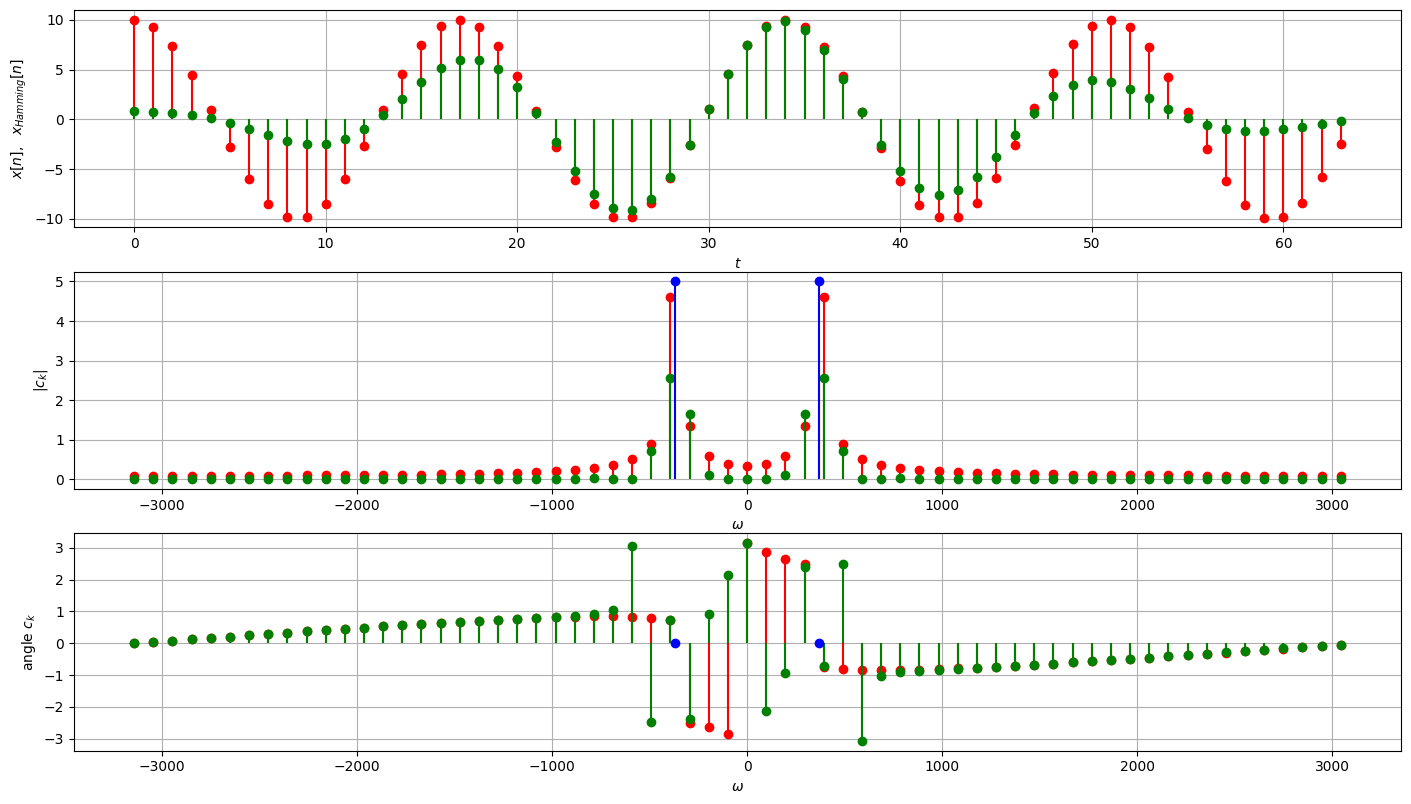

In [3]:
# >>>>>>>>>>>>>>>>> #fs_cos_bad_Hamming <<<<<<<<<<<<<<<<<<<<<<<<<
xn1 = 10 * np.cos(om1 * n1 * Ts)
xn1h = xn * np.hamming(N)

fig, ax = plt.subplots(3,1,figsize=(14,8))
fig.tight_layout()
ax[0].stem(n1, xn,basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].stem(n1, xn1h,basefmt=" ",linefmt='g',markerfmt='go')
ax[0].grid()
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x[n],~~x_{Hamming}[n]$')

# computation
Xk = np.fft.fft(xn1)
c = np.fft.fftshift(Xk / N)
Xk = np.fft.fft(xn1h)
ch = np.fft.fftshift(Xk / N)  # with Hamming

#visualization
k = np.arange(-int(N/2), int(N/2))
ax[1].stem(k * 2 * np.pi / N * Fs, np.abs(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].stem(k * 2 * np.pi / N * Fs, np.abs(ch),basefmt=" ",linefmt='g',markerfmt='go')
ax[1].stem([-om1,om1], np.abs([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_ylabel('$|c_k|$')

ax[2].stem(k * 2 * np.pi / N * Fs, np.angle(c),basefmt=" ",linefmt='r',markerfmt='ro')
ax[2].stem(k * 2 * np.pi / N * Fs, np.angle(ch),basefmt=" ",linefmt='g',markerfmt='go')
ax[2].stem([-om1,om1], np.angle([cm1t,c1t]),basefmt=" ",linefmt='b',markerfmt='bo')
ax[2].grid()
ax[2].set_xlabel('$\omega$')
ax[2].set_ylabel('angle $c_k$')


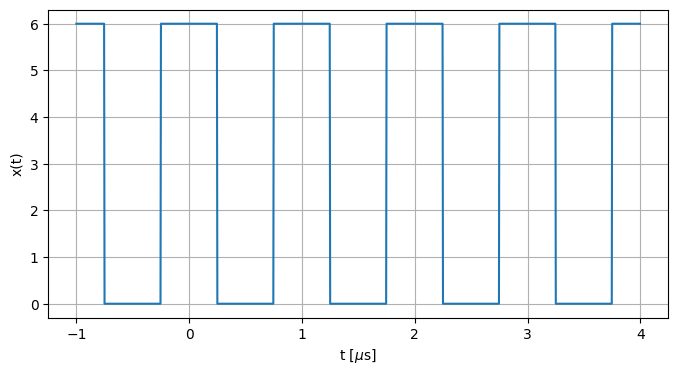

In [4]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_ok <<<<<<<<<<<<<<<<<<<<<<<<<
f1 = 1000000
N=256
T1 = 1/f1
theta = T1 / 2
D = 6
om1 = 2 * np.pi * f1
om_cross = 2*np.pi / theta
t = np.arange(-T1,4*T1,T1/N)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
for ii in range(-1,4):
  x[indices+ii*N]=D
plt.figure(figsize=(8,4))
plt.plot(t*1000000,x)
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().grid()

Text(0, 0.5, 'arg $c_k$')

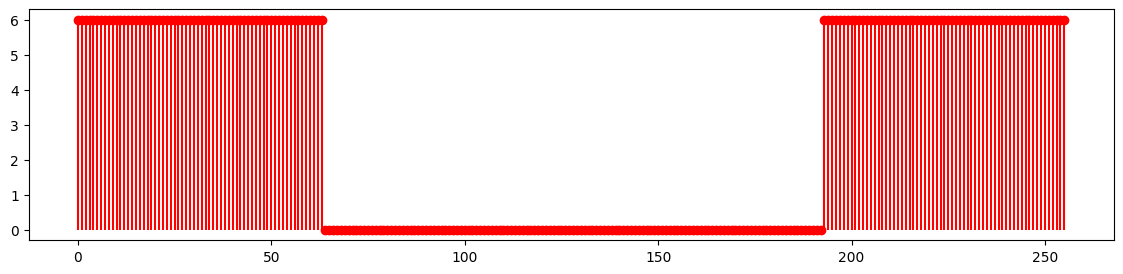

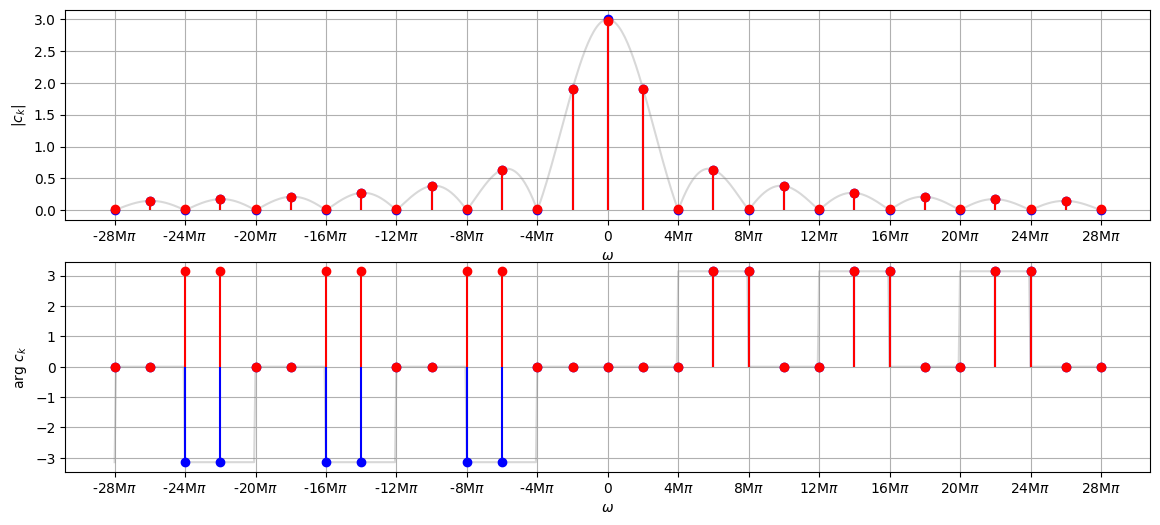

In [5]:
# its FS theoretically ...
om = np.arange(-7*om_cross, 7*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(7 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-7*om_cross,8*om_cross,om_cross)
omticklabels = ['-28M$\pi$','-24M$\pi$','-20M$\pi$','-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$','20M$\pi$','24M$\pi$','28M$\pi$']

# and by DFT .....
n = np.arange(N)
xn1 = np.zeros(n.shape)
xn1[n < theta/2/T1 * N] = 6
xn1[n > N - theta/2/T1 * N] = 6
plt.figure(figsize=(14,3))
plt.stem(n, xn1,basefmt=" ",linefmt='r',markerfmt='ro')
# computation
Xk = np.fft.fft(xn1)
cdft = np.fft.fftshift(Xk / N)
kdft = k + int(N/2)

_, ax = plt.subplots(2,1,figsize=(14,6))
ax[0].plot(om,msinc,color='gray',alpha=0.3)
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='b',markerfmt='bo')
ax[0].stem(k*om1,np.abs(cdft[kdft]),basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray',alpha=0.3)
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bo')
ax[1].stem(k*om1,np.angle(cdft[kdft]),basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

Text(0, 0.5, 'arg $c_k$')

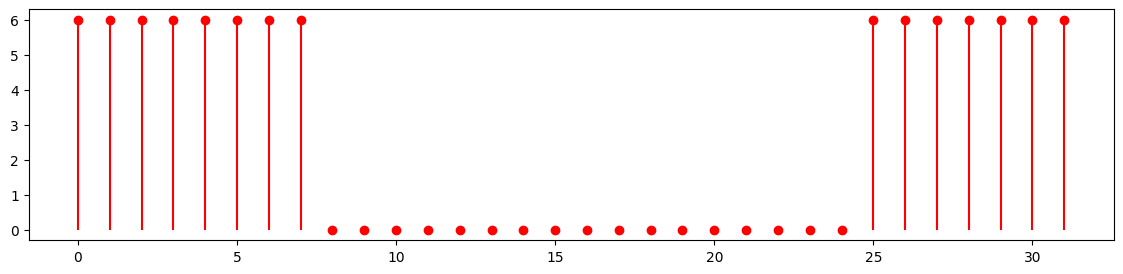

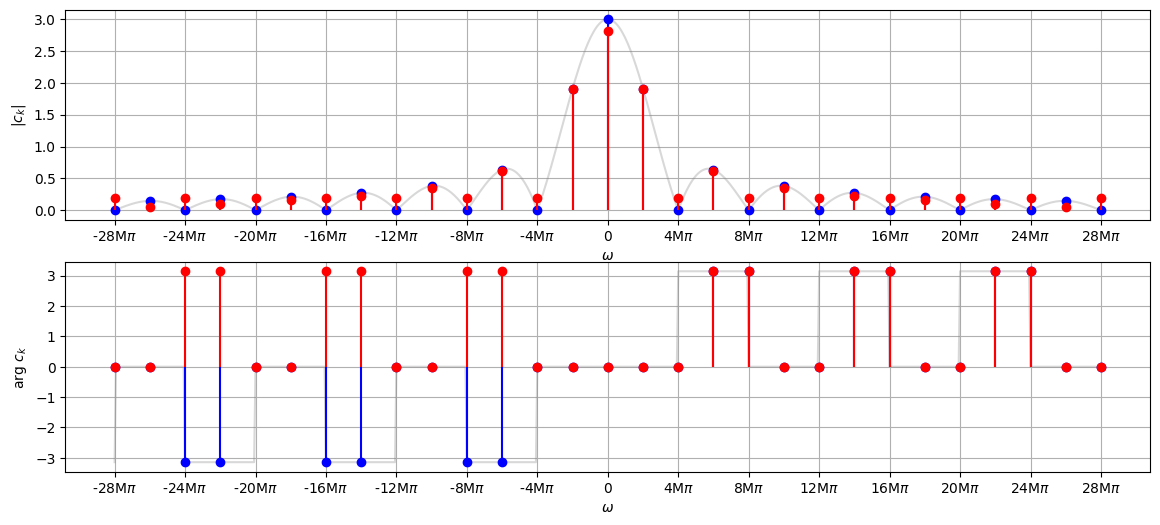

In [6]:
# >>>>>>>>>>>>>>>>> #fs_rectangles_1Mhz_bad <<<<<<<<<<<<<<<<<<<<<<<<<
N = 32
om = np.arange(-7*om_cross, 7*om_cross, om_cross/50)
rsinc = D * theta / T1 * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

kmax = int(7 * om_cross / om1)
k = np.arange(-kmax,kmax+1)
#print([om1, kmax , k])
ck = D * theta / T1 * np.sinc(theta / 2 * k * om1 / np.pi)
mck = np.abs(ck)
ack = np.angle(ck)  # need the same trick ...
ack = np.abs(ack)
negindices = np.argwhere(k < 0)
ack[negindices] = -ack[negindices]

omticks = np.arange(-7*om_cross,8*om_cross,om_cross)
omticklabels = ['-28M$\pi$','-24M$\pi$','-20M$\pi$','-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$','20M$\pi$','24M$\pi$','28M$\pi$']

# and by DFT .....
n = np.arange(N)
xn1 = np.zeros(n.shape)
xn1[n < theta/2/T1 * N] = 6
xn1[n > N - theta/2/T1 * N] = 6
plt.figure(figsize=(14,3))
plt.stem(n, xn1,basefmt=" ",linefmt='r',markerfmt='ro')
# computation
Xk = np.fft.fft(xn1)
cdft = np.fft.fftshift(Xk / N)
kdft = k + int(N/2)

_, ax = plt.subplots(2,1,figsize=(14,6))
ax[0].plot(om,msinc,color='gray',alpha=0.3)
ax[0].grid()
ax[0].stem(k*om1,mck,basefmt=" ",linefmt='b',markerfmt='bo')
ax[0].stem(k*om1,np.abs(cdft[kdft]),basefmt=" ",linefmt='r',markerfmt='ro')
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|c_k|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='gray',alpha=0.3)
ax[1].grid()
ax[1].stem(k*om1,ack,basefmt=" ",linefmt='b',markerfmt='bo')
ax[1].stem(k*om1,np.angle(cdft[kdft]),basefmt=" ",linefmt='r',markerfmt='ro')
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $c_k$')

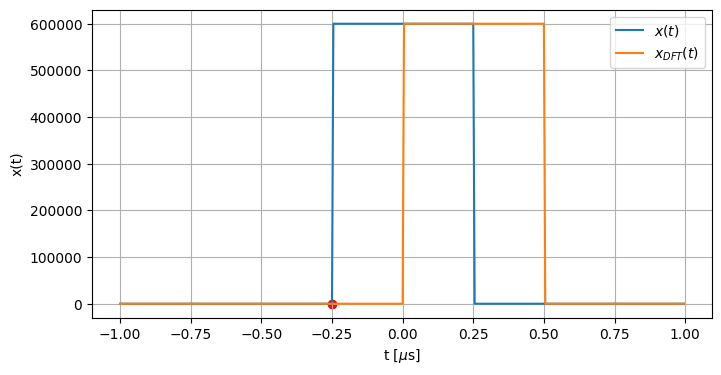

In [7]:
# >>>>>>>>>>>>>>>>> #ft_rectangle_0.5us <<<<<<<<<<<<<<<<<<<<<<<<<
theta = 0.5e-6
D = 600000
t = np.arange(-2*theta,2*theta,theta/100)
x = np.zeros(t.size)
indices = np.argwhere((t > -theta/2) & (t < +theta/2))
x[indices]=D
xdft = np.zeros(t.size)
indices = np.argwhere((t > 0) & (t < +theta))
xdft[indices]=D
t_start = -theta/2

plt.figure(figsize=(8,4))
plt.plot(t*1000000,x,label='$x(t)$')
plt.plot(t*1000000,xdft,label='$x_{DFT}(t)$')
plt.gca().set_xlabel('t [$\mu$s]')
plt.gca().set_ylabel('x(t)')
plt.gca().legend()
plt.gca().grid()
plt.scatter(t_start*1000000, 0, color='r')


Text(0, 0.5, 'arg $X(j\\omega)$')

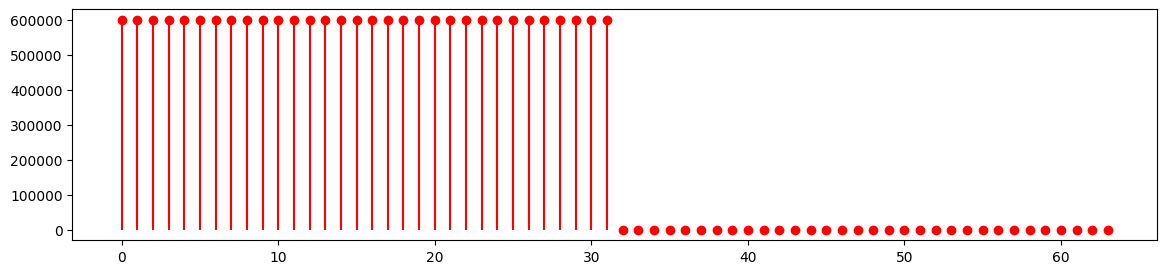

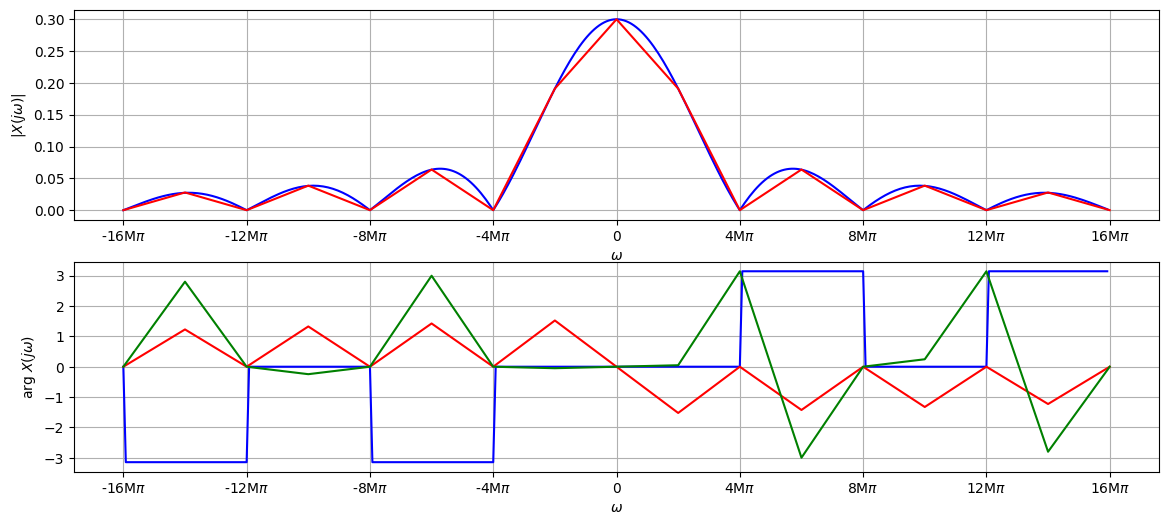

In [8]:
# spectrum
om_cross = 2*np.pi / theta
ommin = -4*om_cross
ommax = 4*om_cross
om = np.arange(ommin, ommax, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

# and by DFT .....
N = 64
Fs = 64e6
Ts = 1 / Fs
n = np.arange(N)
xn1 = np.zeros(n.shape)
xn1[n < theta*Fs] = 600000
plt.figure(figsize=(14,3))
plt.stem(n, xn1,basefmt=" ",linefmt='r',markerfmt='ro')
# computation
Xk = np.fft.fft(xn1)
Xjom = Ts * np.fft.fftshift(Xk)
omdft = 2*np.pi*Fs*np.arange(-int(N/2), int(N/2)) / N
ii = np.argwhere((omdft > ommin) & (omdft < ommax))
omdft_show = omdft[ii]
Xjom_show = Xjom[ii]

# correction of phase ...
phase_corr = np.angle(Xjom_show * np.exp(-1j * omdft_show * t_start))

_, ax = plt.subplots(2,1,figsize=(14,6))
ax[0].plot(om,msinc,color='b')
ax[0].plot(omdft_show,np.abs(Xjom_show),color='r')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='b')
ax[1].plot(omdft_show,np.angle(Xjom_show),color='r')
ax[1].plot(omdft_show,phase_corr,color='g')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $X(j\omega)$')


Text(0, 0.5, 'arg $X(j\\omega)$')

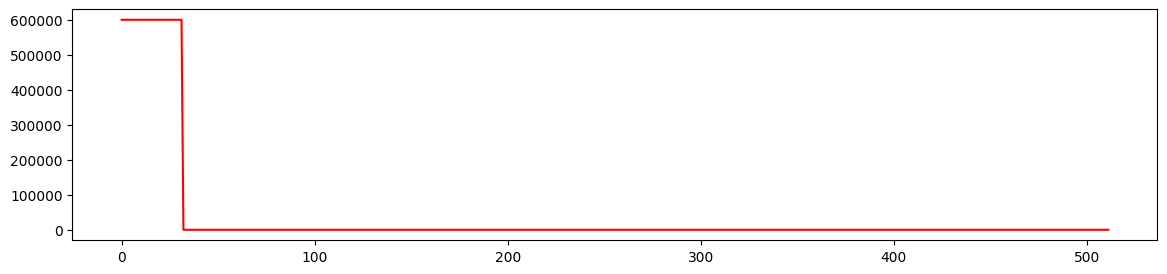

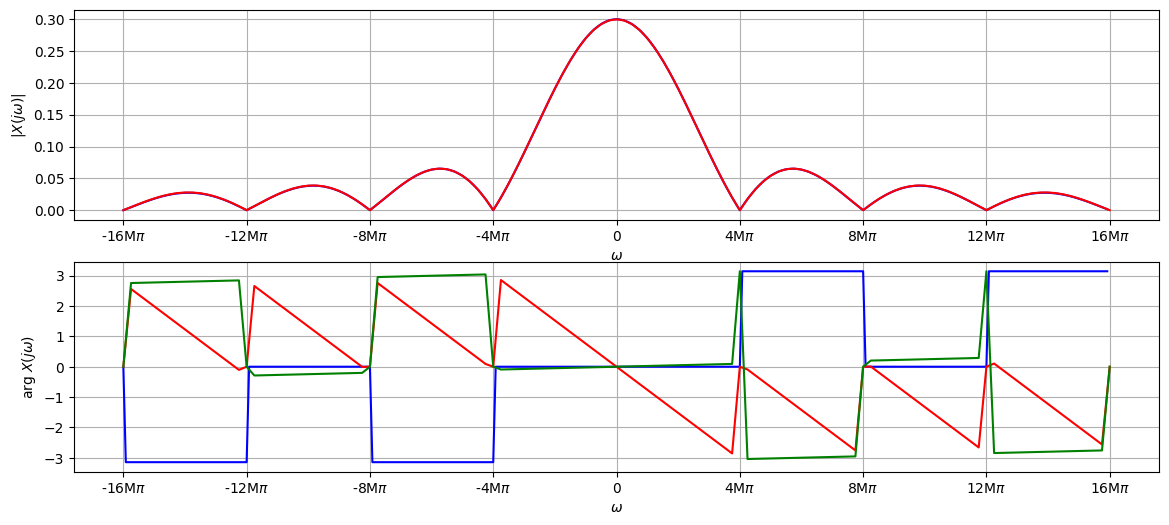

In [9]:
# >>>>>>>>>>>>>>>>> #ft_rectangle_0.5us_zeropad <<<<<<<<<<<<<<<<<<<<<<<<<
om_cross = 2*np.pi / theta
ommin = -4*om_cross
ommax = 4*om_cross
om = np.arange(ommin, ommax, om_cross/50)
rsinc = D * theta * np.sinc(theta /2 * om / np.pi)
msinc = np.abs(rsinc)
asinc = np.angle (rsinc) # needs a bit of massaging ...
asinc = np.abs(asinc)
negindices = np.argwhere(om < 0)
asinc[negindices] = -asinc[negindices]

omticks = np.arange(-4*om_cross,5*om_cross,om_cross)
omticklabels = ['-16M$\pi$', '-12M$\pi$', '-8M$\pi$', '-4M$\pi$', '0', '4M$\pi$', '8M$\pi$', '12M$\pi$', '16M$\pi$' ]

# and by DFT with zero padding
N = 64
Nfft = 512   # <--- change this to lower vallues !
Fs = 64e6
Ts = 1 / Fs
n = np.arange(N)
n_zp = np.arange(Nfft)
xn1 = np.zeros(n.shape)
xn1[n < theta*Fs] = 600000
xn1_zp = np.zeros(Nfft)
xn1_zp[:N] = xn1
plt.figure(figsize=(14,3))
plt.plot(n_zp, xn1_zp,color='r')

# computation
Xk_zp = np.fft.fft(xn1_zp)
Xjom_zp = Ts * np.fft.fftshift(Xk_zp)
omdft = 2*np.pi*Fs*np.arange(-int(Nfft/2), int(Nfft/2)) / Nfft
ii = np.argwhere((omdft > ommin) & (omdft < ommax))
omdft_show = omdft[ii]
Xjom_show = Xjom_zp[ii]

# correction of phase ...
phase_corr = np.angle(Xjom_show * np.exp(-1j * omdft_show * t_start))

_, ax = plt.subplots(2,1,figsize=(14,6))
ax[0].plot(om,msinc,color='b')
ax[0].plot(omdft_show,np.abs(Xjom_show),color='r')
ax[0].grid()
ax[0].set_xlabel('$\omega$')
ax[0].set_ylabel('$|X(j\omega)|$')
ax[0].set_xticks(omticks)
ax[0].set_xticklabels(omticklabels)

ax[1].plot(om,asinc,color='b')
ax[1].plot(omdft_show,np.angle(Xjom_show),color='r')
ax[1].plot(omdft_show,phase_corr,color='g')
ax[1].grid()
ax[1].set_xlabel('$\omega$')
ax[1].set_xticks(omticks)
ax[1].set_xticklabels(omticklabels)
ax[1].set_ylabel('arg $X(j\omega)$')
